**Credit Risk Assessment with Home Credit Data**

**Aim: Build a model that predicts the probability that a client will default on a loan**

**Background**: Many people around the world struggle to get access to financial services because they lack a traditional credit history. This is a major challenge for financial institutions that rely on historical credit bureau data to assess creditworthiness.

Home Credit Group, operates in several countries providing loans to people who are underserved by traditional banking. Their aim is to expand financial inclusion by using alternative data and smarter risk models to make better lending decisions.

To improve their risk prediction models, Home Credit released this dataset to the public through Kaggle. The idea is that machine learning can help find new ways of predicting risk using non-traditional data, like demographics, employment history, and personal documentation status.

Dataset: https://www.kaggle.com/competitions/home-credit-default-risk/data?select=application_test.csv

In [ ]:
# # mounting drive
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#Since the file size is huge uploading the zip file and reading the csv file
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with zipfile.ZipFile('/content/drive/My Drive/Colab_Notebooks/application_train.csv.zip', 'r') as zip_ref:
    with zip_ref.open('application_train.csv') as file:
        rawdf = pd.read_csv(file)

In [3]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
rawdf.shape

(307511, 122)

In [5]:
rawdf.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


***Data Cleaning***

**1. Handling Null and Missing Values**

In [6]:
#looking for any missing values
print(rawdf.isna().any()[rawdf.isna().any()])

AMT_ANNUITY                   True
AMT_GOODS_PRICE               True
NAME_TYPE_SUITE               True
OWN_CAR_AGE                   True
OCCUPATION_TYPE               True
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     True
AMT_REQ_CREDIT_BUREAU_WEEK    True
AMT_REQ_CREDIT_BUREAU_MON     True
AMT_REQ_CREDIT_BUREAU_QRT     True
AMT_REQ_CREDIT_BUREAU_YEAR    True
Length: 67, dtype: bool


In [7]:
#checking for null values
all_null_columns = rawdf.columns[rawdf.isnull().any()]
all_null_columns

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

We see there are many features with null values

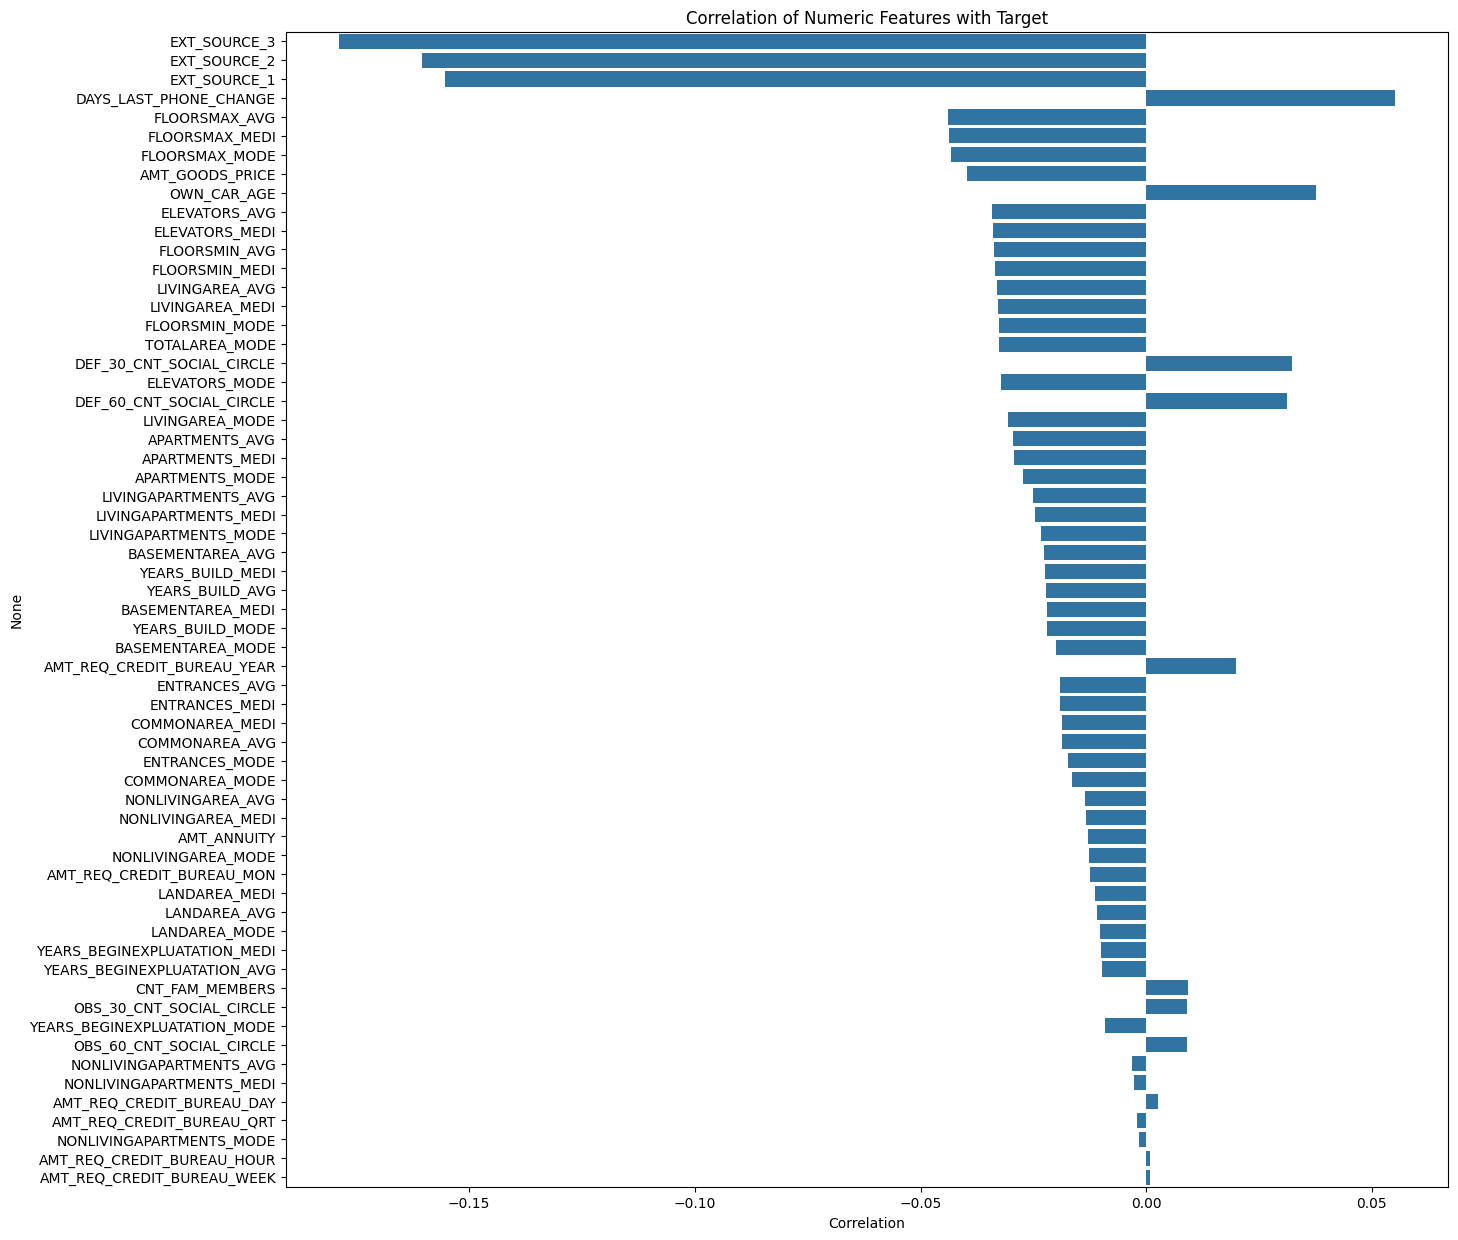

In [8]:
#Understanding if any of the numeric features with high rate of missing values has impact on loan_status using correlation
target_col = 'TARGET'

null_numeric_col = rawdf[all_null_columns].select_dtypes(exclude='object').columns

# Removing the target column if it's in the list
null_numeric_col = null_numeric_col.drop(target_col, errors='ignore')

# Calculate correlation with target
cor_with_target = rawdf[null_numeric_col].corrwith(rawdf[target_col]).sort_values(key=abs, ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.barplot(x=cor_with_target.values, y=cor_with_target.index)
plt.title('Correlation of Numeric Features with Target')
plt.xlabel('Correlation')
plt.show()

In [9]:
# Top 10 numeric features most correlated with TARGET
print("Top 10 correlated numeric features with TARGET:\n")
print(cor_with_target.head(10))

Top 10 correlated numeric features with TARGET:

EXT_SOURCE_3             -0.178919
EXT_SOURCE_2             -0.160472
EXT_SOURCE_1             -0.155317
DAYS_LAST_PHONE_CHANGE    0.055218
FLOORSMAX_AVG            -0.044003
FLOORSMAX_MEDI           -0.043768
FLOORSMAX_MODE           -0.043226
AMT_GOODS_PRICE          -0.039645
OWN_CAR_AGE               0.037612
ELEVATORS_AVG            -0.034199
dtype: float64


So based on correlation index droppping all the columns with missing values except some which might have impact on target attribute prediction

In [10]:
# List of columns to keep
columns_to_keep = ['EXT_SOURCE_3', 'EXT_SOURCE_2','EXT_SOURCE_1','DAYS_LAST_PHONE_CHANGE','FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE',
 'AMT_GOODS_PRICE','OWN_CAR_AGE','ELEVATORS_AVG','ELEVATORS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MEDI','LIVINGAREA_AVG','LIVINGAREA_MEDI',
 'FLOORSMIN__MODE','TOTALAREA_MODE','DEF_30_CNT_SOCIAL_CIRCLE','ELEVATORS_MODE']

# Drop all numeric columns with <50% missing that are NOT in the keep list
columns_to_drop = [col for col in null_numeric_col if col not in columns_to_keep]

# Drop those columns from the DataFrame
rawdf.drop(columns=columns_to_drop, axis=1, inplace=True)

In [11]:
#filling the remaining missing values of numeric columns with the mean value
all_null_col = rawdf.columns[rawdf.isna().any()]
null_numeric_col = rawdf[all_null_col].select_dtypes(exclude='object').columns
rawdf[null_numeric_col] = rawdf[null_numeric_col].fillna(rawdf[null_numeric_col].mean())

In [ ]:
# from sklearn.impute import KNNImputer

# # Initialize the KNN imputer
# knn_imputer = KNNImputer(n_neighbors=5)

# # Apply KNN imputer to fill missing values in numeric columns
# rawdf[null_numeric_col] = knn_imputer.fit_transform(rawdf[null_numeric_col])

In [12]:
#Understanding if any of the categorical features with high rate of missing values has impact on loan_status using Chi-Square Test
from scipy.stats import chi2_contingency

#defining chi-square function, it computes the p-value for chi-square test of independet feature and target variable
def chi_square_test(df, feature, target):
  #creating cross table which counts the occurence of each comninnation of feature and target
  contigency_table = pd.crosstab(df[feature],df[target])
  #performing ch-square test and obtaining chi-square statistic, pvalue, degrees of freedom, expected count if two variables were independent
  chi2, p,dof,expected = chi2_contingency(contigency_table)
  return p

all_null_columns = rawdf.columns[rawdf.isnull().any()]

null_cat_col = rawdf[all_null_columns].select_dtypes(include='object').columns

p_values = {}
for col in null_cat_col:
  p_value = chi_square_test(rawdf,col,'TARGET')
  p_values[col] = p_value
p_values

{'NAME_TYPE_SUITE': np.float64(1.1329313903575907e-05),
 'OCCUPATION_TYPE': np.float64(3.7844998567642684e-288),
 'FONDKAPREMONT_MODE': np.float64(0.0007732982001133781),
 'HOUSETYPE_MODE': np.float64(9.992328040454538e-07),
 'WALLSMATERIAL_MODE': np.float64(1.4531802848120748e-27),
 'EMERGENCYSTATE_MODE': np.float64(1.1386802431747463e-06)}

Since the p-value of all the categorial columns is less than 0.05 it signifies high importance in predicting target variables hence not dropping these columns.

Replacing the missing values of categorical columns with mode

In [13]:
for col in null_cat_col:
  #rawdf[col].fillna(rawdf[col].mode()[0], inplace=True)
  rawdf[col] = rawdf[col].fillna(rawdf[col].mode()[0])

**Handling Duplicates**

So, there are no duplicate values in the dataset

In [14]:
rawdf.duplicated().sum()

np.int64(0)

**Handling Outliers**

In [15]:
# Select only numeric columns for IQR calculation
numeric_rawdf = rawdf.select_dtypes(exclude='object')
Q1 = numeric_rawdf.quantile(0.25)
Q3= numeric_rawdf.quantile(0.75)
IQR = Q3-Q1

outliers = (numeric_rawdf < (Q1- 1.5*IQR)) | (numeric_rawdf > (Q3 + 1.5*IQR))
outlier_count = outliers.sum()
outlier_count

,0
SK_ID_CURR,0
TARGET,24825
CNT_CHILDREN,4272
AMT_INCOME_TOTAL,14035
AMT_CREDIT,6562
...,...
FLAG_DOCUMENT_17,82
FLAG_DOCUMENT_18,2500
FLAG_DOCUMENT_19,183
FLAG_DOCUMENT_20,156


In [16]:
#Replacing the outlier with nearest boundary(Q1 - 1.5*IQR OR Q3+1.5*IQR)
#Cap Outliers(Winsorization) method
import numpy as np
clean_df= rawdf.copy()

num_col = clean_df.select_dtypes(exclude='object').columns
num_col = num_col.drop('TARGET')

for col in num_col:
  lower = Q1[col] - 1.5*IQR[col]
  upper = Q3[col] + 1.5*IQR[col]
  clean_df[col] = np.where(clean_df[col] < lower, lower, np.where(clean_df[col] > upper, upper, clean_df[col]))

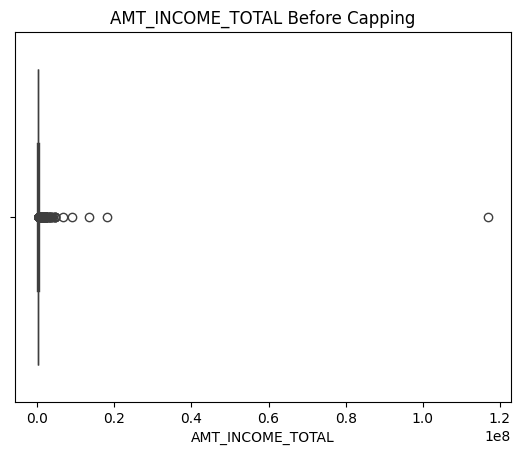

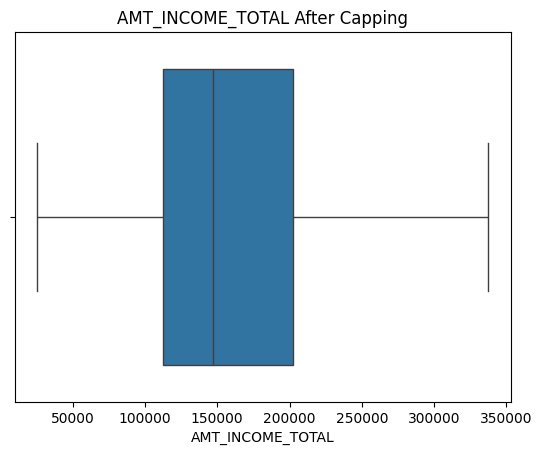

In [17]:
# Before capping
sns.boxplot(x=rawdf['AMT_INCOME_TOTAL'])
plt.title('AMT_INCOME_TOTAL Before Capping')
plt.show()

# After capping
sns.boxplot(x=clean_df['AMT_INCOME_TOTAL'])
plt.title('AMT_INCOME_TOTAL After Capping')
plt.show()

Identifying outliers in categorical columns.
1. We observe XNA values in CODE_GENDER and ORGANIZATION_TYPE columns which seems either the classification of unkown values or data entry error.

In [18]:
categorical_col = clean_df.select_dtypes(include='object').columns

for col in categorical_col:
  print(f' {col} :  {clean_df[col].unique()}')

 NAME_CONTRACT_TYPE :  ['Cash loans' 'Revolving loans']
 CODE_GENDER :  ['M' 'F' 'XNA']
 FLAG_OWN_CAR :  ['N' 'Y']
 FLAG_OWN_REALTY :  ['Y' 'N']
 NAME_TYPE_SUITE :  ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
 NAME_INCOME_TYPE :  ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
 NAME_EDUCATION_TYPE :  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
 NAME_FAMILY_STATUS :  ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
 NAME_HOUSING_TYPE :  ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
 OCCUPATION_TYPE :  ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/ba

In [19]:
import numpy as np

# Replace 'XNA' with np.nan
clean_df['CODE_GENDER'] = clean_df['CODE_GENDER'].replace('XNA', np.nan)
clean_df['ORGANIZATION_TYPE'] = clean_df['ORGANIZATION_TYPE'].replace('XNA', np.nan)

# Fill missing values with mode
clean_df['CODE_GENDER'] = clean_df['CODE_GENDER'].fillna(clean_df['CODE_GENDER'].mode()[0])
clean_df['ORGANIZATION_TYPE'] = clean_df['ORGANIZATION_TYPE'].fillna(clean_df['ORGANIZATION_TYPE'].mode()[0])

***Exploratory Data Analysis***

In [20]:
clean_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0
mean,278180.518577,0.080729,0.407455,162626.947877,5.923130e+05,5.279352e+05,0.020434,-16036.995067,-1203.542428,-4983.512526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,102790.175348,0.272419,0.683742,73303.150927,3.803162e+05,3.370024e+05,0.012377,4363.988632,2732.404969,3513.934117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,4.050000e+04,0.000290,-25229.000000,-6466.500000,-15683.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,189145.500000,0.000000,0.000000,112500.000000,2.700000e+05,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,278202.000000,0.000000,0.000000,147150.000000,5.135310e+05,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,367142.500000,0.000000,1.000000,202500.000000,8.086500e+05,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,456255.000000,1.000000,2.500000,337500.000000,1.616625e+06,1.341000e+06,0.056649,-7489.000000,3417.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


From the histograms it is evident that some features are highly skewed except DAYS_BIRTH.

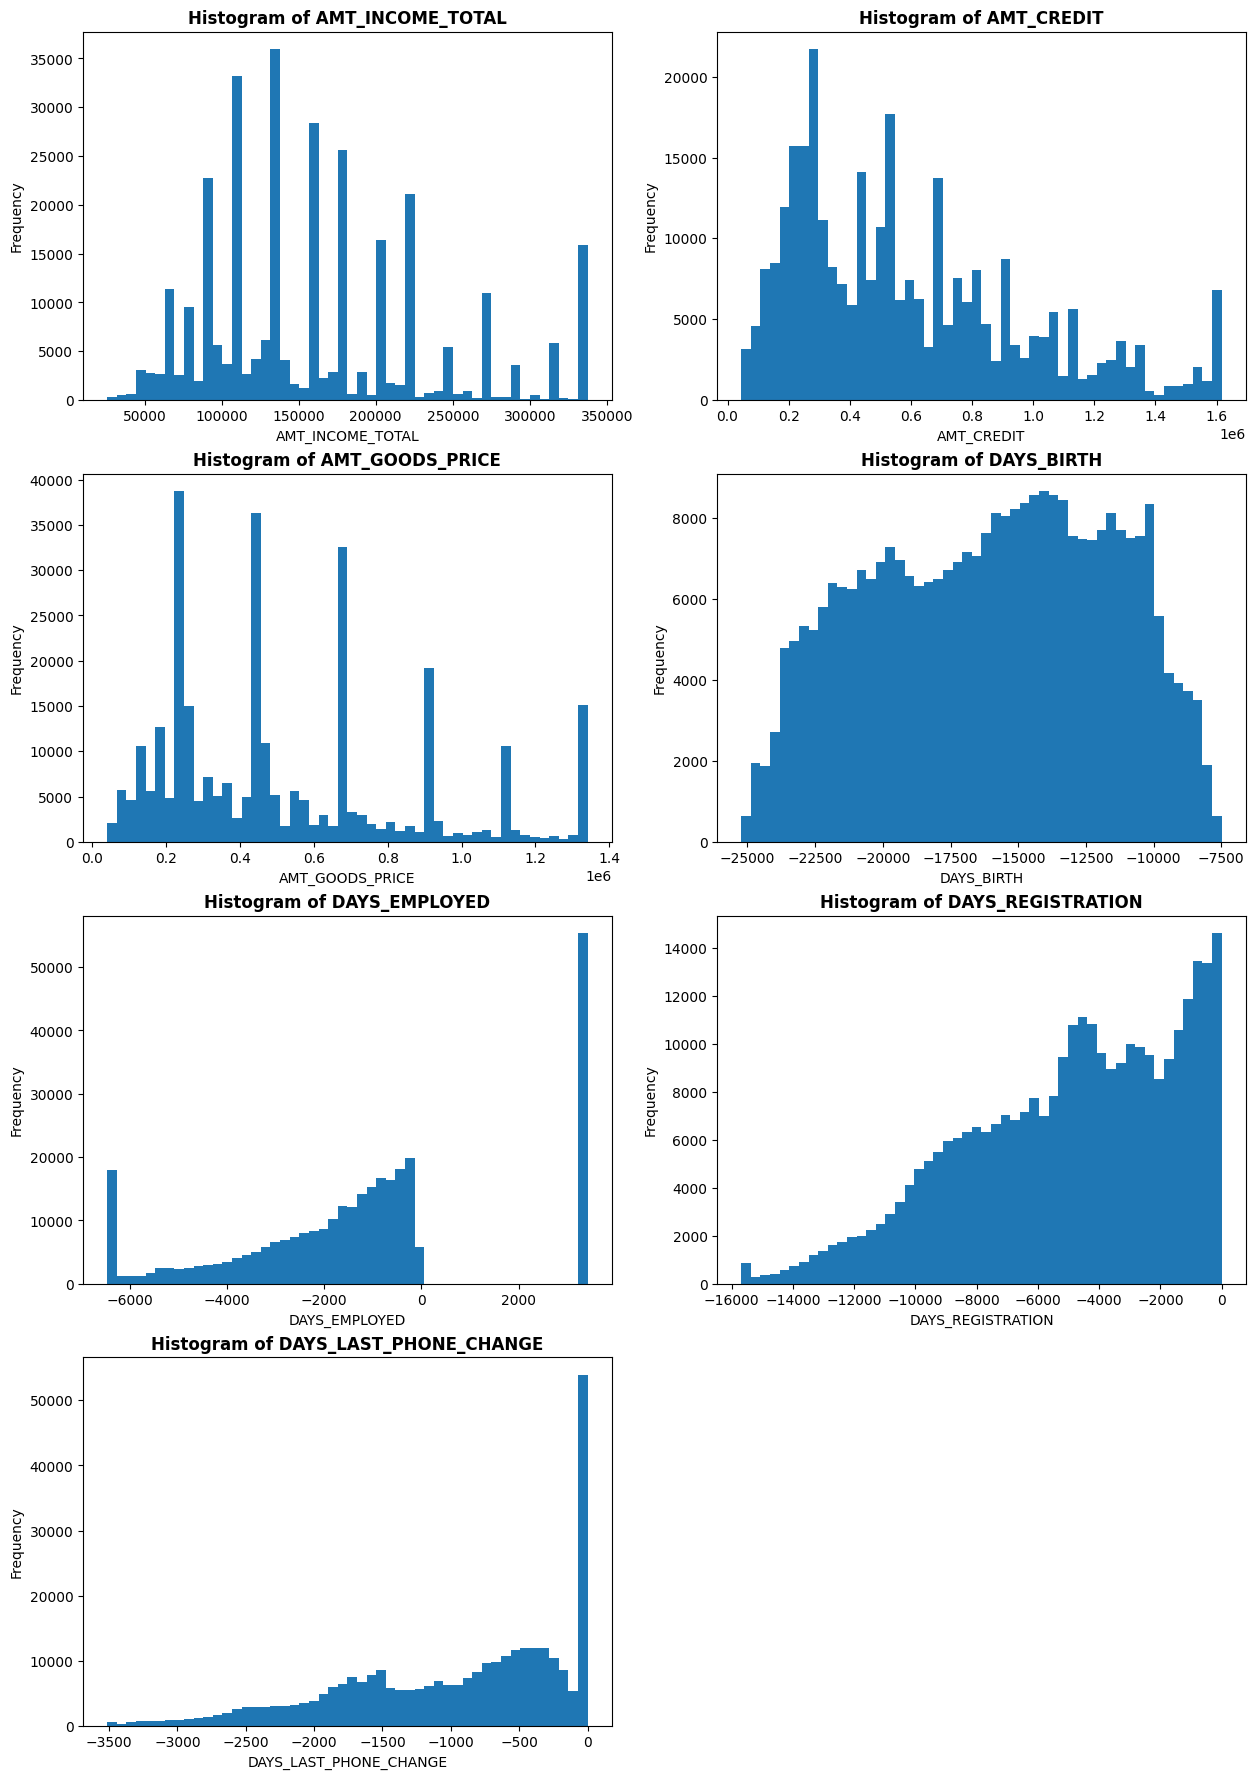

In [21]:
#considering continous numeric features to understand data distribution
#continious columns have been picked considering the columns which have different min, 25%, 50%, 75% values
numeric_columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE']

fig,axes= plt.subplots(4,2,figsize=(15,22))
for i,j in enumerate(numeric_columns):
  ax = axes.flatten()[i]
  ax.hist(clean_df[j],bins=50)
  ax.set_title(f"Histogram of {j}",fontweight='bold')
  ax.set_xlabel(j)
  ax.set_ylabel("Frequency")
#remove the last histogram which is empty
fig.delaxes(axes.flatten()[-1])
plt.show()

Most of the continous features have nearly normal distribution of data except DAYS_LAST_PHONE_CHANGE and DAYS_REGISTRATION columns. Depending on feature importance and models performance we can address this issue by log transforming the feature values or dropping them.

**Transforming Left Skewed Columns**

In [22]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
def left_transformation(data, column):
  #check if the column has negative value
  if (data[column] < 0).any():
    #choosing Yeo-Johnson transformation
    # Creating a copy to avoid overwriting
    pt = PowerTransformer(method='yeo-johnson')
    #This variable stores the transformed data
    transformed_vals = pt.fit_transform(data[[column]])
    #Creating a new column after transforming it
    data[f'{column}_TRANSFORMED'] = transformed_vals
    # If the skew value is close to 0 then the column is successfully transformed
    print("Skew after Yeo-Johnson:", skew(data[f'{column}_TRANSFORMED']))

def plot_after_transformation(data, column):
  # Creating histogram to analyze transformed data
  plt.hist(data[f'{column}_TRANSFORMED'], bins=5, color='skyblue', edgecolor='black')
  # Add labels and title
  plt.xlabel(f'{column}_TRANSFORMED Value')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {column}_TRANSFORMED', fontweight='bold')
  # Show plot
  plt.show()

Skew after Yeo-Johnson: 0.18708081763041015


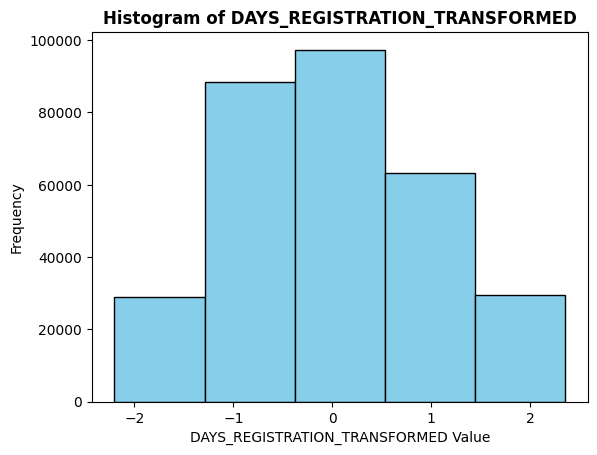

In [23]:
left_transformation(clean_df,'DAYS_REGISTRATION')
plot_after_transformation(clean_df, 'DAYS_REGISTRATION')

Skew after Yeo-Johnson: 0.474398327278356


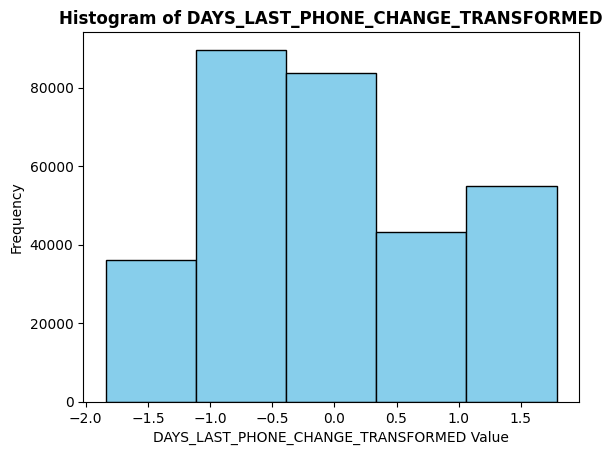

In [24]:
left_transformation(clean_df,'DAYS_LAST_PHONE_CHANGE')
plot_after_transformation(clean_df, 'DAYS_LAST_PHONE_CHANGE')

In [25]:
#dropping the left skewed columns from the dataset
clean_df.drop('DAYS_REGISTRATION', axis=1, inplace=True)
clean_df.drop('DAYS_LAST_PHONE_CHANGE', axis=1, inplace=True)

In [26]:
#understaing the unnatural spikes in DAYS_EMPLOYED column
clean_df['DAYS_EMPLOYED'].value_counts().head(10)

,count
DAYS_EMPLOYED,
3417.5,55374
-6466.5,16843
-200.0,156
-224.0,152
-230.0,151
-199.0,151
-212.0,150
-384.0,143
-229.0,143


Since 3417.5 days_employed value appears more frequent than any other values we can consider this as an outlier and change the value to Nan(Unkown)

In [27]:
#checking the data type of column
print(clean_df['DAYS_EMPLOYED'].dtype)
#Since the data type is float replacing it with np.nan
clean_df['DAYS_EMPLOYED'] = clean_df['DAYS_EMPLOYED'].replace(3417.5, np.nan)

float64


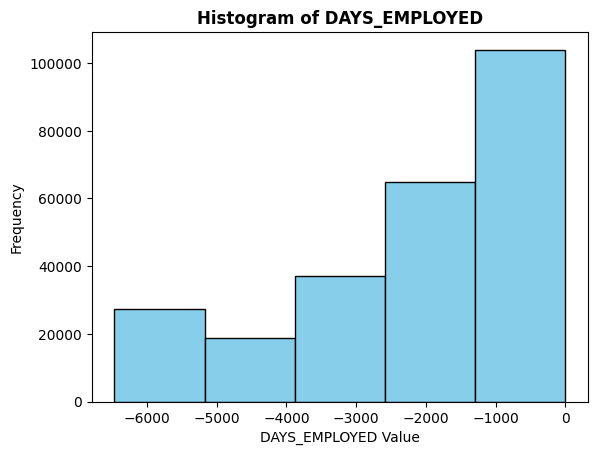

In [28]:
#after replacing the values checking the data distribution
# Creating histogram to analyze transformed data
plt.hist(clean_df['DAYS_EMPLOYED'], bins=5, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('DAYS_EMPLOYED Value')
plt.ylabel('Frequency')
plt.title('Histogram of DAYS_EMPLOYED', fontweight='bold')
# Show plot
plt.show()

**Correlation Heatmap and Feature Engineering**

<ipython-input-29-ccd58a944abe>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df[col].fillna(median_value, inplace=True)


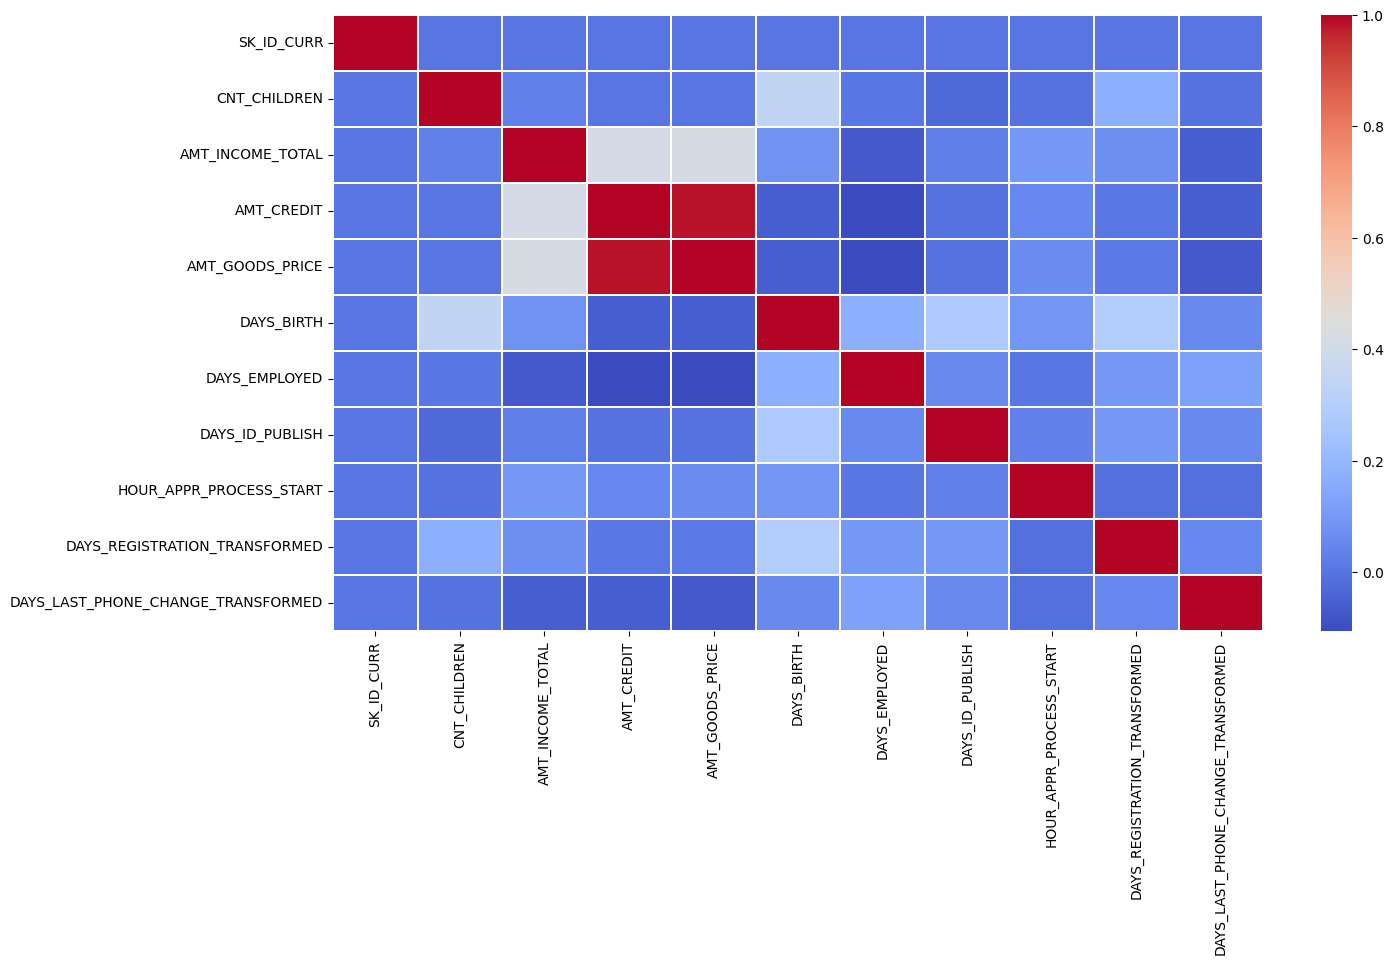

In [29]:
numeric_cols = clean_df.select_dtypes(exclude='object').columns

#Drop columns with low variance
from sklearn.feature_selection import VarianceThreshold
plt.figure(figsize=(15,8))
#Considering only the features with high variance
selector = VarianceThreshold(threshold=0.3)
#Replacing the missing values with median
for col in numeric_cols:
  if clean_df[col].isnull().any():
    median_value = clean_df[col].median()
    clean_df[col].fillna(median_value, inplace=True)
selector.fit(clean_df[numeric_cols])

#selector.fit(clean_df[numeric_cols].fillna(0))

# Keeping only high-variance columns
high_var_cols = clean_df[numeric_cols].columns[selector.get_support()]
correlation_matrix = clean_df[high_var_cols].corr().dropna(axis=0).dropna(axis=1)

# Auto clustering similar features by using clustermap
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.2)
plt.show()

1. From the correlation heatmap one can interpret that AMT_CREDIT and AMT_GOODS_PRICE highly correlated with a value of 1 which indicates as AMT_CREDIT increases AMT_GOODS_PRICE also increases.

In [30]:
#From the correlation heatmap, one could observe AMT_CREDIT and AMT_GOODS_PRICE columns were highly correlated hence using feature engineering
#and deriving a column out of these columns
clean_df['CREDIT_SURPLUS'] = clean_df['AMT_CREDIT'] - clean_df['AMT_GOODS_PRICE']
#dropping one of the column to avoid redundancy
clean_df.drop('AMT_GOODS_PRICE',axis=1, inplace=True)

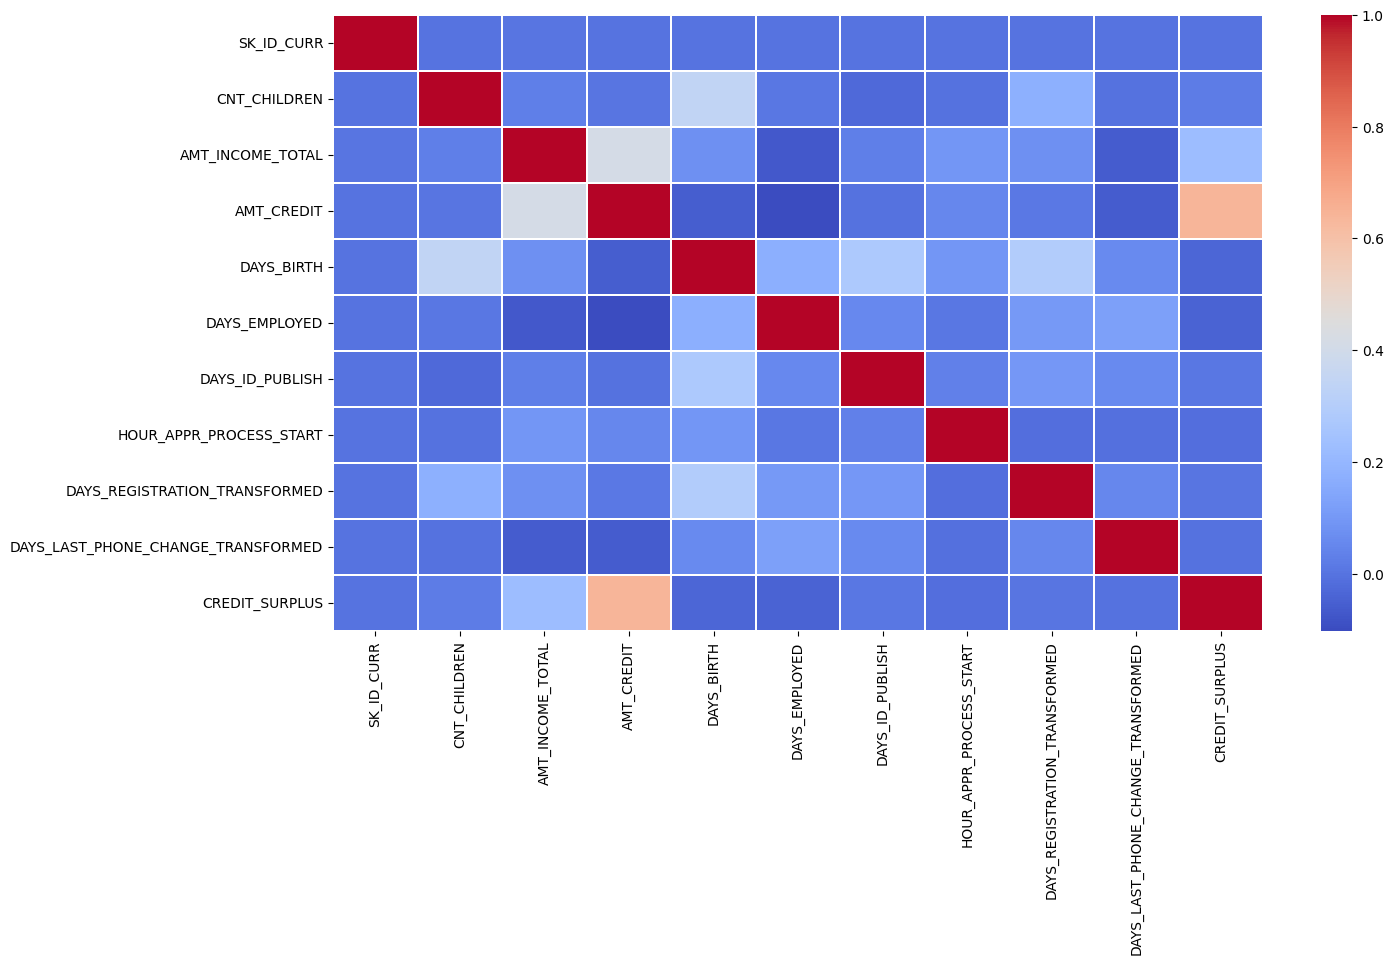

In [31]:
#plotting correlation heatmap again to check correlation after transforming that highly correlated features
numeric_cols = clean_df.select_dtypes(exclude='object').columns

#Drop columns with low variance
from sklearn.feature_selection import VarianceThreshold
plt.figure(figsize=(15,8))
#Considering only the features with high variance
selector = VarianceThreshold(threshold=0.3)
#Replacing the missing values with median
for col in numeric_cols:
  if clean_df[col].isnull().any():
    median_value = clean_df[col].median()
    clean_df[col].fillna(median_value, inplace=True)
selector.fit(clean_df[numeric_cols])

#selector.fit(clean_df[numeric_cols].fillna(0))

# Keeping only high-variance columns
high_var_cols = clean_df[numeric_cols].columns[selector.get_support()]
correlation_matrix = clean_df[high_var_cols].corr().dropna(axis=0).dropna(axis=1)

# Auto clustering similar features by using clustermap
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.2)
plt.show()

1. So from the correlation heatmap the features AMT_CREDIT and CREDIT_SURPLUS are moderately correlated which is expected as CREDIT_SURPLUS is derived from AMT_CREDIT.

**Class Imbalance**

In [32]:
#Looking at the distribution of target
clean_df['TARGET'].value_counts()

,count
TARGET,
0,282686
1,24825


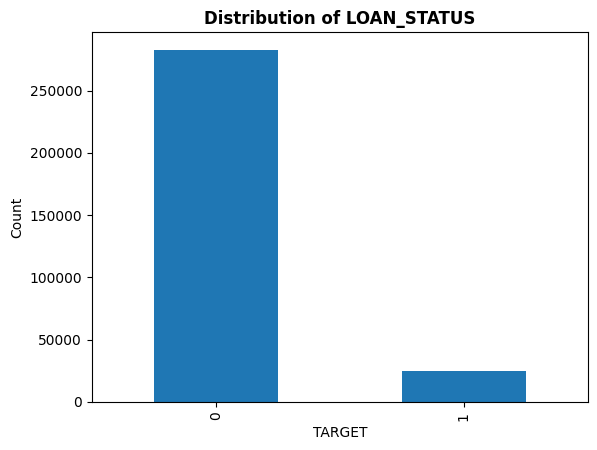

In [33]:
#visualizing the distribution of target attrbute
clean_df['TARGET'].value_counts().plot(kind='bar')
plt.title('Distribution of LOAN_STATUS', fontweight='bold')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

**Imputing and One-Hot Encoding Transformations**

In [34]:
#Encoding categorical columns as some models like logistic regression expect pure numeric data
# from sklearn.preprocessing import LabelEncoder

# for col in clean_df.select_dtypes(include='object').columns:
#   le = LabelEncoder()
#   clean_df[col] = le.fit_transform(clean_df[col])


#using OneHotEncoder to impose ordinal relationships
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

cat_columns = clean_df.select_dtypes(include='object').columns
num_columns = clean_df.select_dtypes(exclude='object').columns


categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, drop=None))
    ])

ct = ColumnTransformer([
    ('cat',categorical_pipeline, cat_columns)
    ], remainder='passthrough')

#fit transform to get new column names
transformed_array = ct.fit_transform(clean_df)

#getting the feature names
cat_feature_names = ct.named_transformers_['cat']['onehot'].get_feature_names_out(cat_columns)
num_columns = [col for col in num_columns if col not in cat_columns]
all_features = list(cat_feature_names) + num_columns
clean_df = pd.DataFrame(transformed_array, columns = all_features)

In [35]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X = clean_df.drop(['TARGET','SK_ID_CURR'], axis=1)
y = clean_df['TARGET']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

**Oversampling the Minority class - SMOTE(Synthetic Minority Over-sampling Technique)**

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=20)
X_resample, y_resample = smote.fit_resample(X_train,y_train)

In [37]:
#verifying if the class is balanced
import pandas as pd
print(pd.Series(y_resample).value_counts())

TARGET
0.0    226147
1.0    226147
Name: count, dtype: int64


***Building Models***

**1. Logistic Regression**

In [38]:
#training Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

logreg_model = LogisticRegression(max_iter = 600, random_state = 20, class_weight='balanced')
logreg_model.fit(X_resample, y_resample)

#predicting test data
logreg_pred = logreg_model.predict(X_test)

#Analysing models performance via confusion matrix, accuracy, precision, recall, and F1 score
cm = pd.DataFrame(confusion_matrix(y_test, logreg_pred, labels = [1,0]),
                  index = ['actual 1', 'actual 0'],
                  columns = ['predicted 1', 'predicted 0'])
print('Logistic Regression Confusion matrix : \n', cm)
print('Accuracy: \n', accuracy_score(y_test, logreg_pred))
print('Precision : \n', precision_score(y_test, logreg_pred, pos_label=1))
print('Recall : \n', recall_score(y_test, logreg_pred, pos_label=1))
print('F1 score: \n', f1_score(y_test,logreg_pred, pos_label=1))

Logistic Regression Confusion matrix : 
           predicted 1  predicted 0
actual 1         3120         1844
actual 0        20560        35979
Accuracy: 
 0.6357250865811424
Precision : 
 0.13175675675675674
Recall : 
 0.628525382755842
F1 score: 
 0.21784666945957268


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**2. XGBoost**

In [39]:
#training XGBoost model
import xgboost as xgb
from xgboost import XGBClassifier

#since SMOTE was causing low recall and F1 score values by only predicting majority class we used scale_pos_weight to focus on minority class
scale = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_model = XGBClassifier(n_estimators = 100, random_state=20, use_label_encoders = False,eval_metric = 'logloss', scale_pos_weight = scale)
xgb_model.fit(X_train, y_train)

#predicting test data
xgb_pred = xgb_model.predict(X_test)

#Analysing models performance via confusion matrix, accuracy, precision, recall, and F1 score
cm = pd.DataFrame(confusion_matrix(y_test, xgb_pred, labels=[1,0]),
                  index = ['actual 1', 'actual 0'],
                  columns = ['predicted 1', 'predicted 0'])
print('XGBoost Confusion matrix : \n', cm)
print('Accuracy: \n', accuracy_score(y_test, xgb_pred))
print('Precision : \n', precision_score(y_test, xgb_pred, pos_label=1))
print('Recall : \n', recall_score(y_test, xgb_pred, pos_label=1))
print('F1 score: \n', f1_score(y_test,xgb_pred, pos_label=1))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoders" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Confusion matrix : 
           predicted 1  predicted 0
actual 1         3009         1955
actual 0        15043        41496
Accuracy: 
 0.7236232378908346
Precision : 
 0.16668513184134723
Recall : 
 0.6061643835616438
F1 score: 
 0.26147028154327423


**3. Random Forest**

In [40]:
#training random forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state=20, class_weight='balanced')
rf_model.fit(X_train, y_train)

#predicting the results
rf_pred = rf_model.predict(X_test)

#Analysing models performance via confusion matrix, accuracy, precision, recall, and F1 score
cm = pd.DataFrame(confusion_matrix(y_test, rf_pred, labels = [1,0]),
                  index = ['actual 1', 'actual 0'],
                  columns = ['predicted 1', 'predicted 0'])
print('Random Forest Confusion Matrix: \n', cm)
print('Accuracy: \n', accuracy_score(y_test, rf_pred))
print('Precision: \n', precision_score(y_test, rf_pred, pos_label= 1))
print('Recall: \n', recall_score(y_test, rf_pred, pos_label=1))
print('F1 score: \n', f1_score(y_test, rf_pred, pos_label=1))

Random Forest Confusion Matrix: 
           predicted 1  predicted 0
actual 1            5         4959
actual 0            1        56538
Accuracy: 
 0.9193535274702047
Precision: 
 0.8333333333333334
Recall: 
 0.001007252215954875
F1 score: 
 0.002012072434607646


**4. Decision Tree**

In [41]:
#training decision tree model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 20)
dt_model.fit(X_train, y_train)

#predicting the results
dt_pred = dt_model.predict(X_test)

#Analysing models performance via confusion matrix, accuracy, precision, recall, and F1 score
cm = pd.DataFrame(confusion_matrix(y_test, dt_pred, labels=[1,0]),
                  index = ['actual 1','actual 0'],
                  columns = ['predicted 1', 'predicted 0'])
print('Decision Tree Confusion Matrix: \n', cm)
print('Acuuracy: \n', accuracy_score(y_test, dt_pred))
print('Precision: \n', precision_score(y_test, dt_pred, pos_label = 1))
print('Recall: \n', recall_score(y_test, dt_pred, pos_label=1))
print('F1 score: \n', f1_score(y_test, dt_pred, pos_label=1))

Decision Tree Confusion Matrix: 
           predicted 1  predicted 0
actual 1          787         4177
actual 0         4890        51649
Acuuracy: 
 0.8525762970911988
Precision: 
 0.13862955786506959
Recall: 
 0.15854149879129734
F1 score: 
 0.14791842871910535


**Receiver Operating Characteristic(ROC)**

It's a curve that plots:



*   True Positive Rate (TPR) on the Y-axis
*   False Positive Rate (FPR) on the X-axis





It shows how well a binary classifier distinguishes between two classes across different threshold settings.

**AUC(Area Under the Curve):**It measures the area under the ROC curve.
A single scalar value that summarizes the curve into a number between 0 and 1.

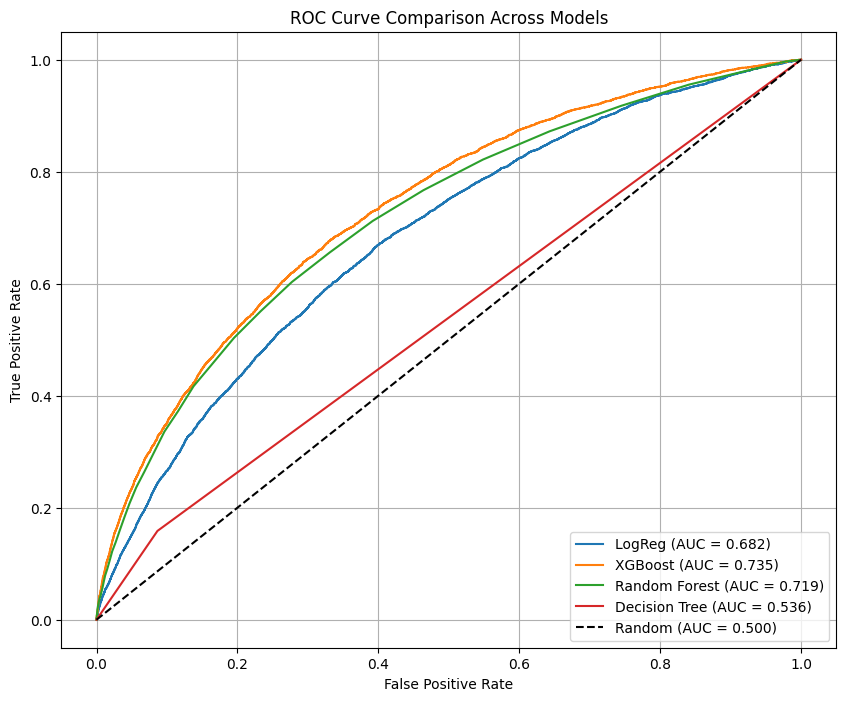

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve

# Create a new figure
plt.figure(figsize=(10, 8))

# 1. Logistic Regression
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
auc_logreg = roc_auc_score(y_test, logreg_probs)
plt.plot(fpr_logreg, tpr_logreg, label=f'LogReg (AUC = {auc_logreg:.3f})')

# 2. XGBoost
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
auc_xgb = roc_auc_score(y_test, xgb_probs)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})')

# 3. Random Forest
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = roc_auc_score(y_test, rf_probs)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')

# 4. Decision Tree
dt_probs = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
auc_dt = roc_auc_score(y_test, dt_probs)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')

# ⚠️ Diagonal line (Random Classifier reference)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')

# 🧾 Plot Formatting
plt.title('ROC Curve Comparison Across Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Model Results**



| Models            | Logistic Regression | XGBoost | Random Forest | Decision Tree |
|-------------------|---------------------|---------|---------------|---------------|
| Accuracy          | 0.636               | 0.724   | 0.919         | 0.853         |
| Precision         | 0.132               | 0.166   | 0.833         | 0.138         |
| Recall            | 0.627               | 0.606   | 0.001         | 0.158         |
| F1 Score          | 0.217               | 0.261   | 0.002         | 0.147         |
| ROC-AUC           | 0.682               | 0.735   | 0.719         | 0.536         |

So based on model results, though Random Forest has high accuracy and precicion the best balanced model is XGBoost in terms of precision, recall, F1-score, and AUC.

**Enhancing Best Balanced Model**

**1. Hyperparameter Tuning for XGBoost**

In [48]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5,7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(random_state=20,eval_metric='logloss'),param_grid=params, scoring='f1', cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [43]:
#Rebuilding the model with parametrs from hyperparameter tuning
scale = y_train.value_counts()[0] / y_train.value_counts()[1]  # For class imbalance

xgb_best_1 = XGBClassifier(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    scale_pos_weight=scale,
    random_state=20,
    eval_metric='logloss'
)

xgb_best_1.fit(X_train, y_train)
xgb_best_1_pred = xgb_best_1.predict(X_test)

#Analysing models performance via confusion matrix, accuracy, precision, recall, and F1 score
cm = pd.DataFrame(confusion_matrix(y_test, xgb_best_1_pred, labels=[1,0]),
                  index = ['actual 1', 'actual 0'],
                  columns = ['predicted 1', 'predicted 0'])
print('XGBoost Confusion matrix : \n', cm)
print('Accuracy: \n', accuracy_score(y_test, xgb_best_1_pred))
print('Precision : \n', precision_score(y_test, xgb_best_1_pred, pos_label=1))
print('Recall : \n', recall_score(y_test, xgb_best_1_pred, pos_label=1))
print('F1 score: \n', f1_score(y_test,xgb_best_1_pred, pos_label=1))

XGBoost Confusion matrix : 
           predicted 1  predicted 0
actual 1         2959         2005
actual 0        13928        42611
Accuracy: 
 0.7409394663674943
Precision : 
 0.17522354473855628
Recall : 
 0.5960918614020951
F1 score: 
 0.27083428676033133


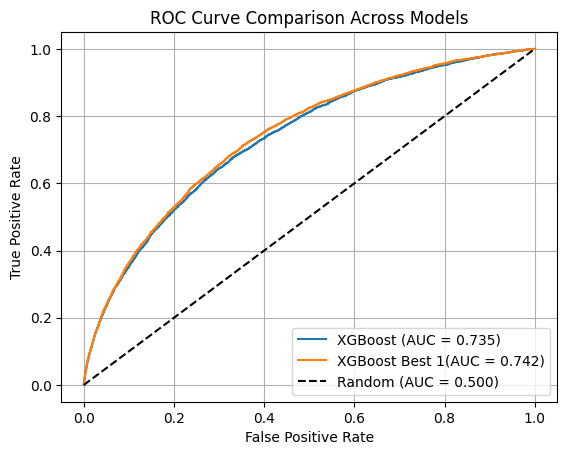

In [45]:
#comparing XGBoost with XGBoost Best 1 models ROC Curves
# 1. XGBoost
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
auc_xgb = roc_auc_score(y_test, xgb_probs)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})')

# 2. XGBoost Best model based on hyperparametrs
xgb_best_1_probs = xgb_best_1.predict_proba(X_test)[:,1]
fpr_xgb_best_1, tpr_xgb_best_1, _ = roc_curve(y_test, xgb_best_1_probs)
auc_xgb_best_1 = roc_auc_score(y_test, xgb_best_1_probs)
plt.plot(fpr_xgb_best_1,tpr_xgb_best_1, label=f'XGBoost Best 1(AUC = {auc_xgb_best_1:.3f})')

# ⚠️ Diagonal line (Random Classifier reference)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')

# 🧾 Plot Formatting
plt.title('ROC Curve Comparison Across Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**2.Feature Importance**

Using SHAP feature importance analysis


*   Understanding directionality of features
*  Explaining individual predictions
*   Handling feature interactions

The Shapley value is a concept from game theory: how much did some cooperating player contribute to the whole?

The Shapley value of player i is the difference between the expected outcome of all the situations where player i did contribute, and the expected outcome of all the situations where player i didn't contribute.

Translated to machine learning: how much did some feature contribute to the prediction, compared to if that feature wasn't considered. (implementations may vary)

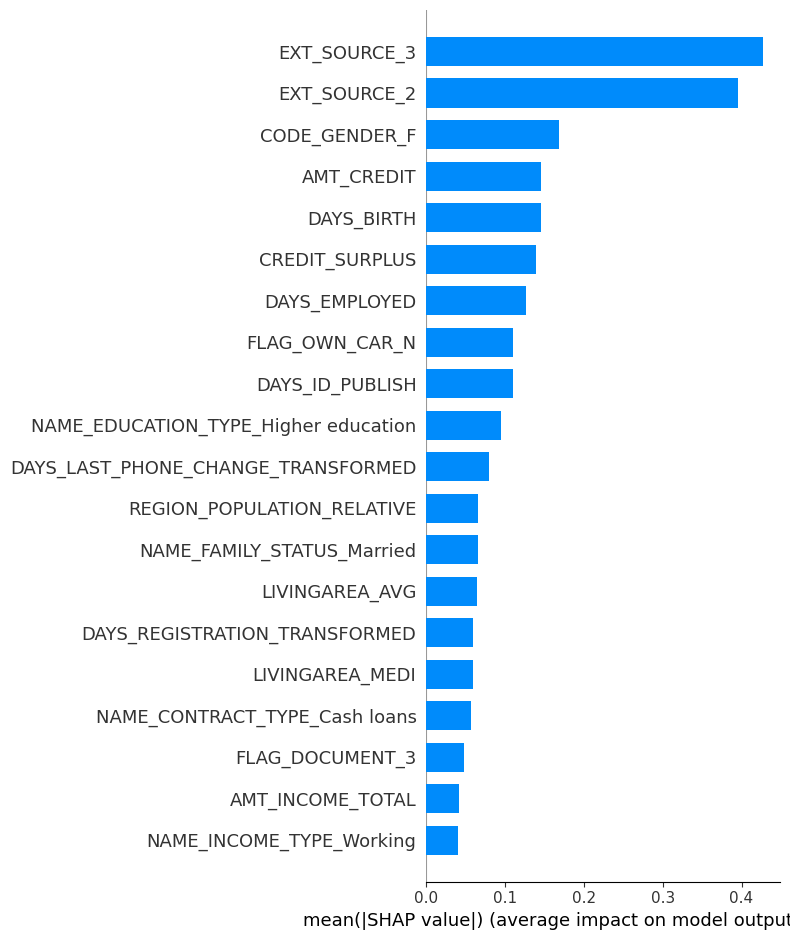

In [86]:
#pip install shap
import shap

#Initializing JS visualization in notebooks
shap.initjs()

#Using TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

#Summary plot (global importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [46]:
#Re-building the model based on model enhancement steps
from xgboost import XGBClassifier

#considering the only the important features from SHAP
shap_imp_columns = ['EXT_SOURCE_3', 'EXT_SOURCE_2','CODE_GENDER_F','AMT_CREDIT','DAYS_BIRTH','CREDIT_SURPLUS','DAYS_EMPLOYED','FLAG_OWN_CAR_N',
                    'DAYS_ID_PUBLISH','NAME_EDUCATION_TYPE_Higher education','DAYS_LAST_PHONE_CHANGE_TRANSFORMED','REGION_POPULATION_RELATIVE',
                    'NAME_FAMILY_STATUS_Married','LIVINGAREA_MEDI','NAME_CONTRACT_TYPE_Cash loans','FLAG_DOCUMENT_3','AMT_INCOME_TOTAL',
                    'NAME_INCOME_TYPE_Working']


scale = y_train.value_counts()[0] / y_train.value_counts()[1]  # For class imbalance

xgb_best_2 = XGBClassifier(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    scale_pos_weight=scale,
    random_state=20,
    eval_metric='logloss'
)

X_train_imp = X_train[shap_imp_columns]
X_test_imp = X_test[shap_imp_columns]

xgb_best_2.fit(X_train_imp, y_train)
xgb_best_2_pred = xgb_best_2.predict(X_test_imp)

#Analysing models performance via confusion matrix, accuracy, precision, recall, and F1 score
cm = pd.DataFrame(confusion_matrix(y_test, xgb_best_2_pred, labels=[1,0]),
                  index = ['actual 1', 'actual 0'],
                  columns = ['predicted 1', 'predicted 0'])
print('XGBoost Confusion matrix : \n', cm)
print('Accuracy: \n', accuracy_score(y_test, xgb_best_2_pred))
print('Precision : \n', precision_score(y_test, xgb_best_2_pred, pos_label=1))
print('Recall : \n', recall_score(y_test, xgb_best_2_pred, pos_label=1))
print('F1 score: \n', f1_score(y_test,xgb_best_2_pred, pos_label=1))

XGBoost Confusion matrix : 
           predicted 1  predicted 0
actual 1         2962         2002
actual 0        14014        42525
Accuracy: 
 0.7395899387021772
Precision : 
 0.17448162111215834
Recall : 
 0.5966962127316681
F1 score: 
 0.2700091157702826


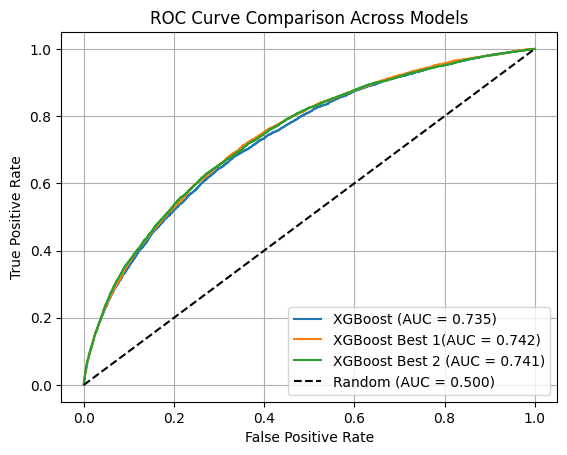

In [47]:
#comparing XGBoost, XGBoost Best 1, XGBoost Best 2 models ROC Curves
# 1. XGBoost
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
auc_xgb = roc_auc_score(y_test, xgb_probs)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})')

# 2. XGBoost Best model based on hyperparametrs
xgb_best_1_probs = xgb_best_1.predict_proba(X_test)[:,1]
fpr_xgb_best_1, tpr_xgb_best_1, _ = roc_curve(y_test, xgb_best_1_probs)
auc_xgb_best_1 = roc_auc_score(y_test, xgb_best_1_probs)
plt.plot(fpr_xgb_best_1,tpr_xgb_best_1, label=f'XGBoost Best 1(AUC = {auc_xgb_best_1:.3f})')

# 3. XGBoost Best model based on important features by SHAP
xgb_best_2_probs = xgb_best_2.predict_proba(X_test_imp)[:,1]
fpr_xgb_best_2, tpr_xgb_best_2, _ = roc_curve(y_test, xgb_best_2_probs)
auc_xgb_best_2 = roc_auc_score(y_test, xgb_best_2_probs)
plt.plot(fpr_xgb_best_2,tpr_xgb_best_2, label=f'XGBoost Best 2 (AUC = {auc_xgb_best_2:.3f})')

# ⚠️ Diagonal line (Random Classifier reference)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')

# 🧾 Plot Formatting
plt.title('ROC Curve Comparison Across Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
#Since we obtained the same parameters as with all features, not rebuilding the model again

#Fine tuning the model with SHAP 20 features
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(random_state=20,eval_metric='logloss'),param_grid=params, scoring='f1', cv=3)
grid_search.fit(X_train_imp, y_train)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


**3. Fine Tuning scale_pos_weight**

In [56]:
#fine tuning the model with scale_pos_weight
from sklearn.metrics import f1_score

scale = y_train.value_counts()[0] / y_train.value_counts()[1]  # For class imbalance

scale_values = [scale * 0.5, scale, scale * 1.5, scale * 2]
best_f1 = 0
best_scale = None

for weight in scale_values:
    model = XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=200,
        subsample=0.8,
        scale_pos_weight=weight,
        random_state=20,
        eval_metric='logloss'
    )
    model.fit(X_train_imp, y_train)
    preds = model.predict(X_test_imp)
    f1 = f1_score(y_test, preds)
    print(f"scale_pos_weight={weight:.2f} -> F1-score: {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_scale = weight

print(f"\nBest scale_pos_weight: {best_scale:.2f} with F1-score: {best_f1:.4f}")

scale_pos_weight=5.69 -> F1-score: 0.2904
scale_pos_weight=11.39 -> F1-score: 0.2700
scale_pos_weight=17.08 -> F1-score: 0.2437
scale_pos_weight=22.77 -> F1-score: 0.2267

Best scale_pos_weight: 5.69 with F1-score: 0.2904


In [48]:
#Re-building the model based on model enhancement steps
from xgboost import XGBClassifier

#rebuilding the model based on best scale_pos_weight: 5.69
xgb_best_3 = XGBClassifier(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    scale_pos_weight=5.69,
    random_state=20,
    eval_metric='logloss'
)

xgb_best_3.fit(X_train_imp, y_train)
xgb_best_3_pred = xgb_best_3.predict(X_test_imp)

#Analysing models performance via confusion matrix, accuracy, precision, recall, and F1 score
cm = pd.DataFrame(confusion_matrix(y_test, xgb_best_3_pred, labels=[1,0]),
                  index = ['actual 1', 'actual 0'],
                  columns = ['predicted 1', 'predicted 0'])
print('XGBoost Confusion matrix : \n', cm)
print('Accuracy: \n', accuracy_score(y_test, xgb_best_3_pred))
print('Precision : \n', precision_score(y_test, xgb_best_3_pred, pos_label=1))
print('Recall : \n', recall_score(y_test, xgb_best_3_pred, pos_label=1))
print('F1 score: \n', f1_score(y_test,xgb_best_3_pred, pos_label=1))

XGBoost Confusion matrix : 
           predicted 1  predicted 0
actual 1         1799         3165
actual 0         5572        50967
Accuracy: 
 0.8579418890135441
Precision : 
 0.24406457739791074
Recall : 
 0.36240934730056407
F1 score: 
 0.2916903121199838


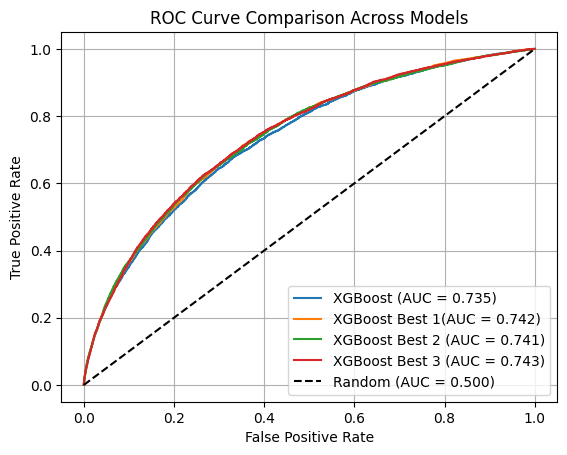

In [49]:
#comparing XGBoost, XGBoost Best 1, XGBoost Best 2 models ROC Curves
# 1. XGBoost
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
auc_xgb = roc_auc_score(y_test, xgb_probs)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})')

# 2. XGBoost Best model based on hyperparametrs
xgb_best_1_probs = xgb_best_1.predict_proba(X_test)[:,1]
fpr_xgb_best_1, tpr_xgb_best_1, _ = roc_curve(y_test, xgb_best_1_probs)
auc_xgb_best_1 = roc_auc_score(y_test, xgb_best_1_probs)
plt.plot(fpr_xgb_best_1,tpr_xgb_best_1, label=f'XGBoost Best 1(AUC = {auc_xgb_best_1:.3f})')

# 3. XGBoost Best model based on important features by SHAP
xgb_best_2_probs = xgb_best_2.predict_proba(X_test_imp)[:,1]
fpr_xgb_best_2, tpr_xgb_best_2, _ = roc_curve(y_test, xgb_best_2_probs)
auc_xgb_best_2 = roc_auc_score(y_test, xgb_best_2_probs)
plt.plot(fpr_xgb_best_2,tpr_xgb_best_2, label=f'XGBoost Best 2 (AUC = {auc_xgb_best_2:.3f})')

# 4. XGBoost Best model based on scale weight 5.69
xgb_best_3_probs = xgb_best_3.predict_proba(X_test_imp)[:,1]
fpr_xgb_best_3, tpr_xgb_best_3, _ = roc_curve(y_test, xgb_best_3_probs)
auc_xgb_best_3 = roc_auc_score(y_test, xgb_best_3_probs)
plt.plot(fpr_xgb_best_3,tpr_xgb_best_3, label=f'XGBoost Best 3 (AUC = {auc_xgb_best_3:.3f})')

# ⚠️ Diagonal line (Random Classifier reference)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')

# 🧾 Plot Formatting
plt.title('ROC Curve Comparison Across Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**It is crucial for Home Credit Group to correctly identify customers who are defaults and non defaults. Home credit group will incur loss**
1. If the model fails to identify actual non-default customers who would repay the loan(precision)
2. Incorrectly identifying default customer as non default and lending loan to default customer(recall).

Hence F1 score is given priority to obtain harmonic mean of precision and recall — it punishes extreme trade-offs and seeks balance.

**Different model results after tuning XGBoost model based on hyperparameter, feature selection, and scale pos weight**

| Models            | XGBoost | XGBoost Best 1 | XGBoost Best 2 | XGBoost Best 3 |
|-------------------|---------|----------------|----------------|----------------|
| Accuracy          | 0.724   | 0.741          | 0.739          | 0.858          |
| Precision         | 0.166   | 0.175          | 0.174          | 0.244          |
| Recall            | 0.606   | 0.596          | 0.596          | 0.362          |
| F1 Score          | 0.261   | 0.271          | 0.270          | 0.292          |
| ROC-AUC           | 0.735   | 0.742          | 0.741          | 0.743          |


So based on results considering XGBoost Best 3 model for identifying the clients will default on a loan which has highest F1 score of 0.292 and high AUC of 0.743.

**Tuning Threshold**

By default XGBoost(classification model) would have considered 0.5 as the default decision boundary. If the model says the chance of default is more than 50%, it predicts a default (class 1). So, tuning the threshold to maximize F1 scoreand to pick a better cutoff using business logic.

In [50]:
from sklearn.metrics import precision_recall_curve
# Actual outcomes (0 = no default, 1 = default)
y_true = y_test

# Model predicted probabilities for class 1 (default)
y_scores = xgb_best_3.predict_proba(X_test_imp)[:, 1]  # Probabilities for class 1

# Get precision-recall pairs at different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)

# Compute F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Get the threshold that gives the best F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print("Best threshold for highest F1:", best_threshold)

Best threshold for highest F1: 0.47143793


In [51]:
#applying the best threshold to get maximum F1 score
# Model predicted probabilities for class 1 (default)
y_scores = xgb_best_3.predict_proba(X_test_imp)[:, 1]  # Probabilities for class 1

y_pred_custom = (y_scores > best_threshold).astype(int)

#evaluating the performance
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
cm_custom = pd.DataFrame(
    confusion_matrix(y_test, y_pred_custom, labels=[1, 0]),
    index=['actual 1', 'actual 0'],
    columns=['predicted 1', 'predicted 0']
)
print("Confusion Matrix (Custom Threshold):\n", cm_custom)

# Performance Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom, pos_label=1))
print("Recall:", recall_score(y_test, y_pred_custom, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred_custom, pos_label=1))
# Calculate AUC
auc = roc_auc_score(y_test, y_scores)
print("ROC AUC Score:", auc)

Confusion Matrix (Custom Threshold):
           predicted 1  predicted 0
actual 1         2035         2929
actual 0         6732        49807
Accuracy: 0.8429182316309773
Precision: 0.23212045169385195
Recall: 0.40995165189363414
F1 Score: 0.2964095841526473
ROC AUC Score: 0.7430034621014704


So by tuning the threshold we not only improved F1 score we also improved recall.

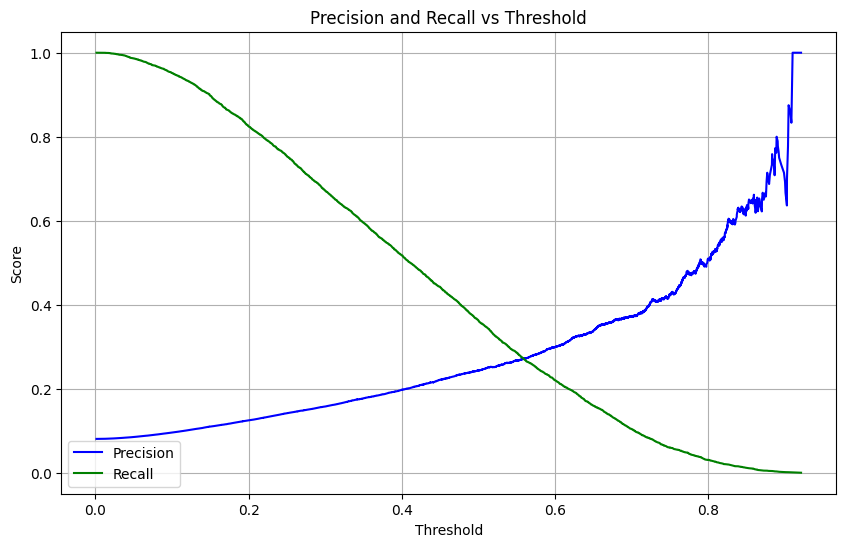

In [53]:
#Visualizing the Precision-Recall (PR) curve and ROC curve will help us understand how different thresholds affect your model’s performance, so we can pick the best trade-off based on your business goals.
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Get precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(10, 6))

# Plot Precision and Recall vs Threshold
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

From the plot we can infer that as the threshold decreases precision decreases and recall increases, hence choosing threshold on 0.471 increased the recall and slightly decreased the precision which could be an ideal trade off to obtain maximum F1 score.

**Model Interpretation**

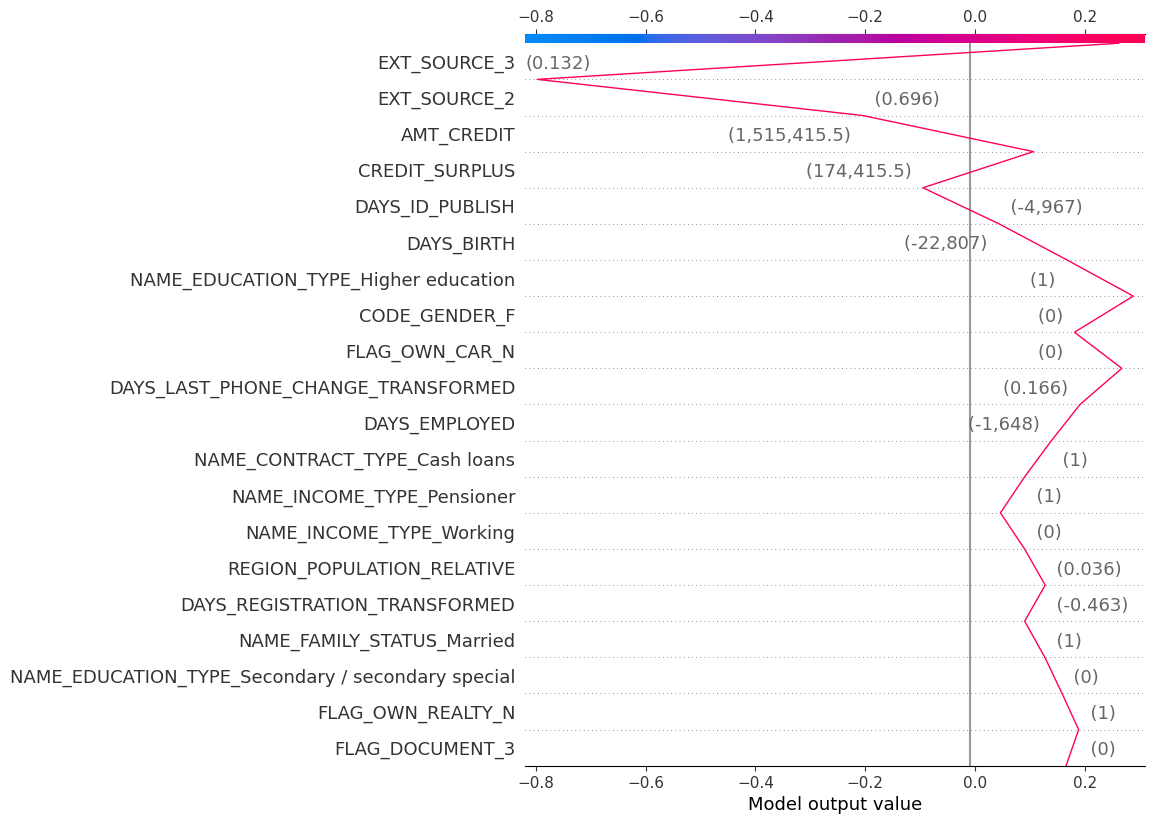

In [87]:
#Using SHAP decision plot to determine how the model arrived at the prediction
shap.decision_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])

From SHAP (SHapley Additive exPlanations) decision plot we can infer the below points

1. The vertical line at 0 represents a neutral SHAP value — i.e., zero contribution to the prediction
2. The starting point of the red line is the base value (i.e., model prediction before applying any feature SHAP values).
3. Right-pointing sections (positive SHAP values) increase default risk.
4. Left-pointing sections (negative SHAP values) decrease default risk.

Interference from the plot

### 🔍 Feature Impact Analysis Table

| Feature                                | Feature Description                                                                 | Impact   |
|----------------------------------------|--------------------------------------------------------------------------------------|----------|
| EXT_SOURCE_3                           | Normalized score from external data source                                          | No Risk  |
| EXT_SOURCE_2                           | Normalized score from external data source                                          | No Risk  |
| AMT_CREDIT                             | Credit amount of the loan                                                           | High Risk|
| CREDIT_SURPLUS                         | Derived column from AMT_CREDIT(LOAN AMOUNT) and AMT_GOODS_PRICE(PRICE OF GOOD FOR WHICH LOAN WAS SANCTIONED)                                  | Slight Risk  |
| DAYS_ID_PUBLISH                        | Days before application when ID document was changed                                | High Risk|
| DAYS_BIRTH                             | Client's age in days at application                                                 | High Risk|
| NAME_EDUCATION_TYPE_Higher education   | Highest education level achieved                                                    | High Risk|
| CODE_GENDER_F                          | Gender of the client                                                                | High Risk|
| FLAG_OWN_CAR_N                         | Whether client owns a car                                                           | High Risk|
| DAYS_LAST_PHONE_CHANGE_TRANSFORMED     | Days before application when phone number was changed                              | High Risk|
| DAYS_EMPLOYED                          | Days before application the person started current employment                       | High Risk|
| NAME_CONTRACT_TYPE_Cash loans          | Whether the loan is cash or revolving                                               | High Risk|
| NAME_INCOME_TYPE_Pensioner             | Client's income type                                                                | High Risk|
| NAME_INCOME_TYPE_Working               | Client's income type                                                                | High Risk|
| REGION_POPULATION_RELATIVE            | Normalized population of client's region                                            | High Risk|
| DAYS_REGISTRATION_TRANSFORMED         | Days before application when client changed registration                            | High Risk|
| NAME_FAMILY_STATUS_Married             | Client’s family status                                                              | High Risk|
| NAME_EDUCATION_TYPE_Secondary/secondary special | Highest education level achieved                                         | High Risk|
| FLAG_OWN_REALTY_N                      | Whether client owns a house or flat                                                 | High Risk|
| FLAG_DOCUMENT_3                        | Whether client provided document 3                                                  | High Risk|
